Explained Variance Ratio: [0.50965387 0.20257549]
Total Explained Variance: 0.7122293642349252


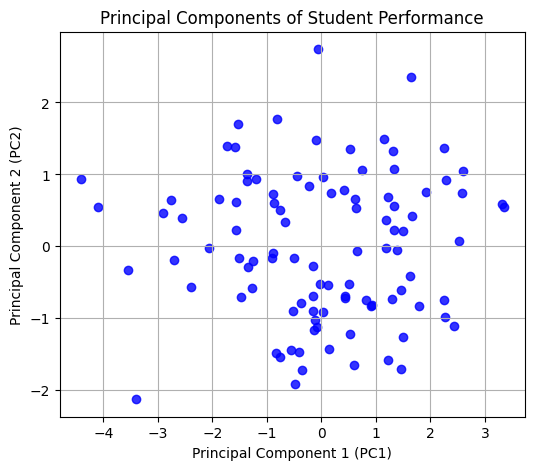

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create Sample Data (Student Performance)
np.random.seed(42)  # For reproducibility
n_students = 100
n_features = 5  # Homework, Quizzes, Project, Attendance, Participation

# Create correlated data
mean = [75, 80, 85, 90, 80]
cov = np.array([[1, 0.7, 0.6, 0.2, 0.5],
                [0.7, 1, 0.5, 0.1, 0.4],
                [0.6, 0.5, 1, 0.3, 0.6],
                [0.2, 0.1, 0.3, 1, 0.2],
                [0.5, 0.4, 0.6, 0.2, 1]])
student_data = np.random.multivariate_normal(mean, cov, n_students)

df = pd.DataFrame(student_data, columns=['Homework', 'Quizzes', 'Project', 'Attendance', 'Participation'])

# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
n_components = 2  # Reduce to 2 dimensions for visualization and interpretation
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)  # Variance explained by each PC
print("Total Explained Variance:", sum(explained_variance)) # Total variance explained by the 2PCs

# Create a DataFrame with the Principal Components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the Principal Components
plt.figure(figsize=(6, 5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', alpha=0.8)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Principal Components of Student Performance')
plt.grid(True)
plt.show()

In [2]:
# Interpreting the Principal Components
components = pca.components_
df_components = pd.DataFrame(components, columns=df.columns, index=['PC1', 'PC2'])
print("\nPrincipal Components (Loading Vectors):\n", df_components)


Principal Components (Loading Vectors):
      Homework   Quizzes   Project  Attendance  Participation
PC1  0.538407  0.485094  0.521292    0.058383       0.446820
PC2 -0.014661 -0.063140  0.089925    0.982887      -0.147126
